# LAB 6

Authors: $\lambda$ Justin Ventura [jventura3@gulls.salisbury.edu] & Blaine Mason $\lambda$

Date: Wednesday, November 18th, 2020.

## - Description -

Supervised Learning: ** k-Nearest Neighbors **

We will be using the kNN algorithm on sample tests to ensure correctness, then apply to the Iris data set (this will be simple considering we have 4 different numeric value (4D vector) and a class), and then the adult data set (this will take more work, as the qualatative data will need adjustments in order to create a numeric representation for the vector; kNN requires numeric values in order to characterize *"distance"*).

In [107]:
# Libraries:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats  # makes my life easier

# Import iris the dataset:
iris = pd.read_csv('iris.data', names=['sep_length', 'sep_width', 'pet_length', 'pet_width', 'class'])
print('iris dataset shape: ', iris.shape)

# Import the adult dataset:
adult = pd.read_csv("adult.data", header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ])
print('adult dataset shape: ', adult.shape)
print('- Justin Ventura & Blaine Mason λ')

iris dataset shape:  (150, 5)
adult dataset shape:  (32561, 15)
- Justin Ventura & Blaine Mason λ


## K-Nearest Neighbor Implementation:

In [108]:
# K-Nearest Neighbor Class.
class kNNModel:
    """ k-Nearest Neighbors Model Class.
    
    Uses training data in order to predict future values
    of new query points.
    """
    # kNN Model Constructor.
    def __init__(self, k: int=3, train_x=None):
        """ Initializes the training_data. [Constructor] 
        
        Args:
            k [int]: the number of neighbors the model should
                     use in the 'voting' system.

            train_x [list]: pre-labeled (class) training data.
            
            -> train_x format: list[list[tuple(<numeric-data>), class]]
        """
        self.k = k
        self.training_data = train_x

    # Calculate the distances of each train point from the test point.
    def distances(self, test_x=None) -> list:
        """ Calculates the distance between the training data & test point. 
        NOTE: done in linear O(n) time.

        Args:
            test_x [float]: a specific value to be tested against the training
            data.
        """
        return np.array([la.norm(t[0] - test_x, axis=0) for t in self.training_data])
    
    # Give the model training data.
    def train(self, train_x=None) -> None:
        """ Trains the model with pre-labelled data.
        
        Args:
            train_x [list]: the training data used to train model.
            * NOTE: if train_x is None, function immediately returns. *
            
            -> train_x format: list[list[tuple(<numeric-data>), class]]

        Returns:
            None.
        """
        if not self.training_data:
            self.training_data = train_x
        else:
            pass
        
    def predict(self, query_point):
        """ Uses the model in order to predict what to label the query point.
        
        Args:
            query_point [tuple(<numeric_data>)]: the point in which a class will
            be predicted for.
            
        Returns:
            'Class' [int]: The 'Class' will be the numeric class that this algorithm
                           deems closest to the possible classes it has been trained
                           to identify.
        """
        # TODO: use a k-d tree for O(logn) searches.  For now we can use the
        # naive O(n) "brute force" approach.
        point_class = [t[1] for t in self.training_data]
        dist = self.distances(query_point)
        dist = [(d, p) for d, p in zip(dist, point_class)]
        dist = sorted(dist)
        d = [dist[i][1] for i in range(self.k)] # 0 is the np.array of points, 1 is the class. 
        return int(stats.mode(d)[0])
    

## Testing kNN model with k = 5.

In this cell, I came up with semi-random* points to mark 'territories' for each class.  Then for points $(x, y)$ sampled uniformly random $\in [-4, 4]$, were used to test against the model.  I am aware that the training data is usually supposed to be greater than the testing data, but I found it interesting to see the cool clusters that form from 100-1000 samples from just knowing 5 points in each class (15 training points in total).  

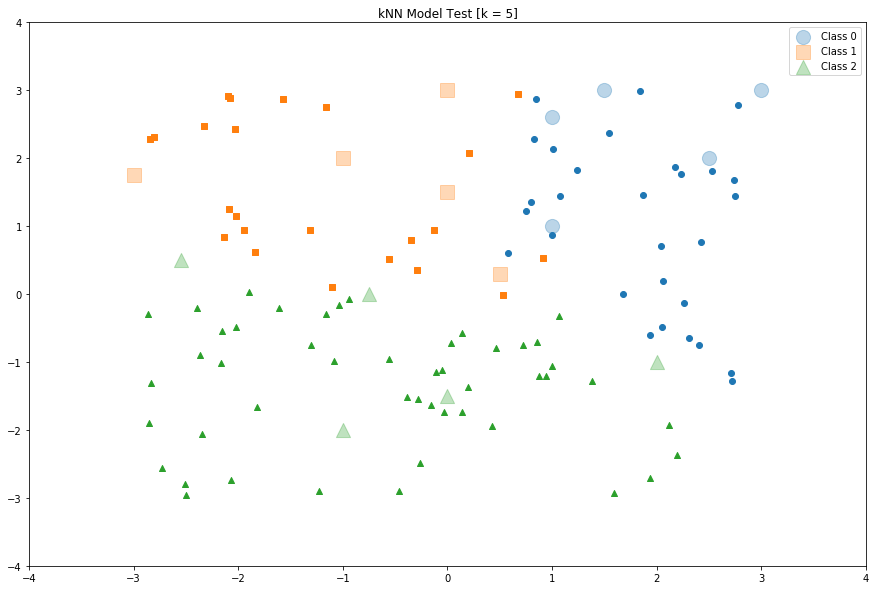

Class 0 has 0.29% of the 'territory.'
Class 1 has 0.23% of the 'territory.'
Class 2 has 0.48% of the 'territory.'


In [138]:
"""
K-NEAREST NEIGHBORS MODEL TESTING CELL:

Justin's IQ peaked while making this. (approximately 56 IQ points, new record!)
"""
# Set up the training data.
train_points0 = [(2.5, 2), (1.5, 3), (1, 2.6), (1, 1), (3, 3)]
train_points0 = np.array([np.array(tup) for tup in train_points0])
train_points1 = [(-1, 2), (.5, 0.3), (0, 3), (0, 1.5), (-3, 1.75)]
train_points1 = np.array([np.array(tup) for tup in train_points1])
train_points2 = [(-1, -2), (-.75, 0), (2, -1), (0, -1.5), (-2.55, 0.5)]
train_points2 = np.array([np.array(tup) for tup in train_points2])
N = len(train_points0)

# Classes for the points.
train_class0 = [0] * N
train_class1 = [1] * N
train_class2 = [2] * N

# Prepare the data to be loaded into the KNN model.
train_data0 = [[tup, c] for tup, c in zip(train_points0, train_class0)]
train_data1 = [[tup, c] for tup, c in zip(train_points1, train_class1)]
train_data2 = [[tup, c] for tup, c in zip(train_points2, train_class2)]
train_data = train_data0 + train_data1 + train_data2
Lambda = kNNModel(5, train_data)

# Take random samples for now.
NUM_SAMPLES = 100
sample_data = {'Class 0': 0, 'Class 1': 0, 'Class 2': 0}
for i in range(NUM_SAMPLES):
    query = np.random.uniform(-3, 3), np.random.uniform(-3, 3)
    
    if Lambda.predict(query) == 0:
        sample_data['Class 0'] += 1
        plt.scatter(query[0], query[1], c='tab:blue', marker='o')
    elif Lambda.predict(query) == 1:
        sample_data['Class 1'] += 1
        plt.scatter(query[0], query[1], c='tab:orange', marker='s')
    elif Lambda.predict(query) == 2:
        sample_data['Class 2'] += 1
        plt.scatter(query[0], query[1], c='tab:green', marker='^')

# Now plot it all, gamers RISE!
X0 = [x for x, _ in train_points0]
Y0 = [y for _, y in train_points0]
X1 = [x for x, _ in train_points1]
Y1 = [y for _, y in train_points1]
X2 = [x for x, _ in train_points2]
Y2 = [y for _, y in train_points2]
plt.title('kNN Model Test [k = 5]')
plt.rcParams['figure.figsize'] = [15, 10]
plt.scatter(X0, Y0, c="tab:blue", label='Class 0', s=200, alpha=0.3, marker='o')    # training group 0
plt.scatter(X1, Y1, c="tab:orange", label='Class 1', s=200, alpha=0.3, marker='s')  # training group 1
plt.scatter(X2, Y2, c="tab:green", label='Class 2', s=200, alpha=0.3, marker='^')   # training group 2
plt.legend()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
for c, count in sample_data.items():
    print(f"{c} has {count/NUM_SAMPLES}% of the 'territory.'")
pass

## Supervised Test against specific points.

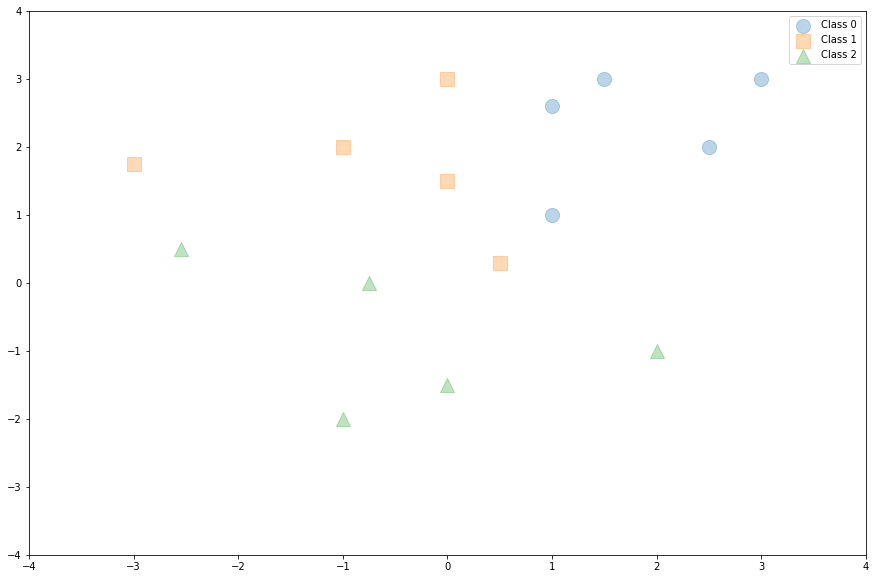

In [140]:
# Plot the given points again.
plt.scatter(X0, Y0, c="tab:blue", label='Class 0', s=200, alpha=0.3, marker='o')    # training group 0
plt.scatter(X1, Y1, c="tab:orange", label='Class 1', s=200, alpha=0.3, marker='s')  # training group 1
plt.scatter(X2, Y2, c="tab:green", label='Class 2', s=200, alpha=0.3, marker='^')   # training group 2
plt.legend()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

## Data Splitting Functions:

In [ ]:
""" 
Here we will 
"""

## Using the iris dataset, test your kNN algorithm to predict which class a given iris belongs to.